In [1]:
import sys
sys.path.insert(0, '../')

import maze_solver as ms

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Epoch: 000/14999 | Loss: 0.0273 | Episodes: 23 | Win count: 1 | Win rate: 0.000 | time: 1.0 seconds
Epoch: 001/14999 | Loss: 0.0471 | Episodes: 1 | Win count: 2 | Win rate: 0.000 | time: 1.0 seconds
Epoch: 002/14999 | Loss: 0.0525 | Episodes: 2 | Win count: 3 | Win rate: 0.000 | time: 1.1 seconds
Epoch: 003/14999 | Loss: 0.0065 | Episodes: 19 | Win count: 4 | Win rate: 0.000 | time: 1.8 seconds
Epoch: 004/14999 | Loss: 0.0079 | Episodes: 3 | Win count: 5 | Win rate: 0.000 | time: 1.9 seconds
Epoch: 005/14999 | Loss: 0.0011 | Episodes: 14 | Win count: 6 | Win rate: 0.000 | time: 2.4 seconds
Epoch: 006/14999 | Loss: 0.0020 | Episodes: 4 | Win count: 7 | Win rate: 0.000 | time: 2.5 seconds
Epoch: 007/14999 | Loss: 0.0022 | Episodes: 107 | Win count: 7 | Win rate: 0.000 | time: 6.5 seconds
Epoch: 008/14999 | Loss: 0.0019 | Episodes: 104 | Win count: 7 | Win rate: 0.000 | time: 10.2 seconds
Epoch: 009/14999 | Loss: 0.0044 | Episodes: 4 | Win count: 8 | Win rate: 0.000 | time: 10.3 seconds
E

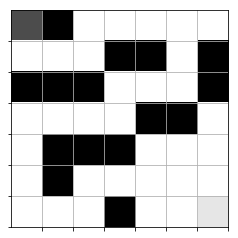

In [2]:
ms.solve()